In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymorphy2

In [ ]:
import re
import pymorphy2
import numpy as np
from scipy.spatial.distance import cosine
from bs4 import BeautifulSoup
import urllib.request 

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def get_text_statistic(filename,codepage='utf-8'):
  n=0 
  d=dict()
  with open(filename,encoding=codepage) as f:
    for line in f:
      for el in re.split('\W+',line.lower()):
        if len(el)>2:
          n+=1
          norm_el=morph.parse(el)[0].normal_form
          d[norm_el]=d.get(norm_el,0)+1
  return n,d

In [ ]:
def get_html_statistic(url):
  html = urllib.request.urlopen(url)
  
 # parsing the html file
  htmlParse = BeautifulSoup(html, 'html.parser')
  
  n=0 
  d=dict()
# getting all the paragraphs
  for line in htmlParse.find_all("p"):
      for el in re.split('\W+',line.get_text().lower()):
        if len(el)>2:
          n+=1
          norm_el=morph.parse(el)[0].normal_form
          d[norm_el]=d.get(norm_el,0)+1

  return n,d

**Особенности внедрения BIM-технологий в строительные компании**

In [ ]:
n1, d1 = get_html_statistic('https://cyberleninka.ru/article/n/osobennosti-vnedreniya-bim-tehnologiy-v-stroitelnye-kompanii')
d1

**Перспективы внедрения BIM-технологий**

In [ ]:
n2, d2=get_html_statistic('https://cyberleninka.ru/article/n/perspektivy-vnedreniya-bim-tehnologiy')
d2

**Сложности внедрения BIM в строительстве**

In [ ]:
n3, d3=get_html_statistic('https://cyberleninka.ru/article/n/slozhnosti-vnedreniya-bim-v-stroitelstve')
d3

In [ ]:
s1=set(np.array(list(d1.keys()))[np.array(list(d1.values()))>1])
s2=set(np.array(list(d2.keys()))[np.array(list(d2.values()))>1])
s3=set(np.array(list(d3.keys()))[np.array(list(d3.values()))>1])

In [ ]:
#Используем метод intersection для нахождения пересечения множеств между токенами всех 3 текстов  
ss1=s1.intersection(s2)
ss2=s2.intersection(s3)
ss3=s1.intersection(s3)
res=list(ss1.union(ss2,ss3))
np.array(res)

array(['настоящий', 'расчёт', 'переход', 'специалист', 'способ', 'путь',
       'строительство', 'уровень', 'проектировщик', 'возможность',
       'отрасль', 'можно', 'building', 'магистрант', 'bim', 'технический',
       'ещё', 'университет', 'говорить', 'электронный', 'дать',
       'государственный', 'проектирование', 'связанный', 'инженерный',
       'только', 'свойство', 'иметь', 'всё', 'информация', 'большой',
       'структура', 'менее', 'стоимость', 'компания', 'интегрировать',
       'задача', 'количество', 'рис', 'анализ', 'институт', 'ключевой',
       'уже', 'проблема', 'тот', 'организация', 'полностью', 'проект',
       'документация', 'статья', 'такой', 'представить', 'участник',
       'новый', 'являться', 'применение', 'более', 'принцип',
       'предприятие', '2017', 'программный', 'элемент', 'решение',
       'другой', 'развитие', 'позволять', 'различный', 'мочь', 'объект',
       'что', 'данные', 'управление', 'преимущество', 'обеспечение',
       'технология', 'осущ

In [ ]:
mas=['настоящий', 'расчёт', 'переход', 'специалист', 'строительство', 'проектировщик', 'возможность', 'отрасль', 'building', 'магистрант', 'bim', 'технический',
'университет', 'электронный', 'государственный', 'проектирование', 'связанный', 'инженерный', 'информация', 'структура', 'стоимость', 'компания','задача', 
'анализ', 'институт', 'ключевой', 'проблема', 'организация', 'проект', 'документация', 'участник', 'новый', 'программный', 'элемент', 'решение', 'развитие', 
'объект', 'данные', 'управление', 'преимущество', 'обеспечение', 'технология', 'information', 'сложность', 'система', 'ошибка', 'цикл', 'обращение', 
'эффективность', 'этап', 'информационный', 'сокращение', 'обучение', 'сооружение', 'результат', 'работа', 'взаимодействие', 'здание', 'жизненный', 
'внедрение', 'модель', 'создание', 'моделирование', 'современный', 'архитектурный', 'особенность', 'проектный', 'программа', 'процесс', 'подход', 'россия',
'использовать', 'высокий', 'изменение',
'строительный', 'стандарт']

In [ ]:
d_base=dict()
for el in mas:
  d_base[el]=(d1.get(el,0)/n1+d2.get(el,0)/n2+d3.get(el,0)/n3)/3

In [ ]:
d_base

{'настоящий': 0.0015933737597631289,
 'расчёт': 0.0011154378333530694,
 'переход': 0.001995447767997379,
 'специалист': 0.0017153897888025705,
 'строительство': 0.01102694294491186,
 'проектировщик': 0.0011991418957102101,
 'возможность': 0.0018374058178420116,
 'отрасль': 0.00423492759407364,
 'building': 0.003076383710612106,
 'магистрант': 0.0013579458610543688,
 'bim': 0.032027314653866656,
 'технический': 0.002828541576589265,
 'университет': 0.0021542517333415375,
 'электронный': 0.0011999039108990016,
 'государственный': 0.001994685752808587,
 'проектирование': 0.005349603412237919,
 'связанный': 0.0020329977194908882,
 'инженерный': 0.0016395278706267606,
 'информация': 0.002155775763719121,
 'структура': 0.0011983798805214184,
 'стоимость': 0.0023224218732446106,
 'компания': 0.0045063814138983265,
 'задача': 0.0019109816904514468,
 'анализ': 0.0015926117445743376,
 'институт': 0.0011983798805214184,
 'ключевой': 0.0016770778221202696,
 'проблема': 0.006432285377523644,
 'орга

In [ ]:
def get_dict(n, d, d_base):
  d_res=dict()
  for el in d_base.keys():
    d_res[el]=d.get(el,0)/n
  return d_res

In [ ]:
def boolean_confirm (n, d, d_base):
  d_res= get_dict(n, d, d_base)
  nn=np.min(list(d_res.values()))
  return nn>0

In [ ]:
boolean_confirm(nh, dh, d_base)

False

In [ ]:
def fuzzy_confirm (n, d, d_base, porog=0.5):
  d_res= get_dict(n, d, d_base)
  nn=[1 if d_res[el]>d_base[el] else d_res[el]/d_base[el] for el in d_base.keys()]
  mn=np.min(nn)
  return (mn, mn>porog)

In [ ]:
fuzzy_confirm(nh, dh, d_base,)

(0.0, False)

In [ ]:
get_dict(nh,dh,d_base)

{'настоящий': 0.0,
 'расчёт': 0.00042589437819420784,
 'переход': 0.0,
 'специалист': 0.002555366269165247,
 'строительство': 0.004258943781942078,
 'проектировщик': 0.00042589437819420784,
 'возможность': 0.0034071550255536627,
 'отрасль': 0.0,
 'building': 0.0034071550255536627,
 'магистрант': 0.0,
 'bim': 0.02129471890971039,
 'технический': 0.00042589437819420784,
 'университет': 0.0017035775127768314,
 'электронный': 0.0,
 'государственный': 0.00042589437819420784,
 'проектирование': 0.008517887563884156,
 'связанный': 0.0,
 'инженерный': 0.0017035775127768314,
 'информация': 0.002555366269165247,
 'структура': 0.0,
 'стоимость': 0.00042589437819420784,
 'компания': 0.005536626916524702,
 'задача': 0.0012776831345826234,
 'анализ': 0.0012776831345826234,
 'институт': 0.0,
 'ключевой': 0.00042589437819420784,
 'проблема': 0.00596252129471891,
 'организация': 0.005110732538330494,
 'проект': 0.006388415672913117,
 'документация': 0.002555366269165247,
 'участник': 0.0004258943781942

In [ ]:
def cosine_confirm (n, d, d_base, porog=0.7):
  d_res= get_dict(n, d, d_base)
  n_res=np.array([[d_base[el], d_res[el]] for el in d_base.keys()]).T
  c_res=1-cosine(n_res[0],n_res[1])
  return (c_res, c_res>porog)

In [ ]:
nh,dh=get_html_statistic('https://cyberleninka.ru/article/n/osobennosti-vnedreniya-bim-tehnologii-v-otechestvennye-organizatsii')
dh

In [ ]:
cosine_confirm(nh, dh, d_base, porog=0.7)

In [ ]:
nh1,dh1=get_html_statistic('https://cyberleninka.ru/article/n/raznitsa-mezhdu-bim-i-traditsionnym-proektirovaniem')
cosine_confirm(nh1, dh1, d_base, porog = 0.7)

(0.7973004481788759, True)

In [ ]:
nh2,dh2=get_html_statistic('https://cyberleninka.ru/article/n/bim-modelirovanie-kak-neotemlemaya-chast-sovremennogo-stroitelstva')
cosine_confirm(nh2, dh2, d_base, porog = 0.7)

(0.9329673669778674, True)

In [ ]:
nh4,dh4=get_html_statistic('https://cyberleninka.ru/article/n/osobennosti-vnedreniya-bim-tehnologii-v-otechestvennye-organizatsii')
cosine_confirm(nh4,dh4, d_base, porog=0.7)

(0.8946013693395716, True)

In [ ]:
nh3,dh3=get_html_statistic('https://cyberleninka.ru/article/n/vnedrenie-bim-v-ao-lenpromtransproekt')
cosine_confirm(nh3,dh3, d_base, porog=0.7)

(0.580691262027501, False)

In [ ]:

def transform_html(url,d_base,mas):

  html = urllib.request.urlopen(url)
  
 # parsing the html file
  htmlParse = BeautifulSoup(html, 'html.parser')
  
# getting all the paragraphs
  for line in htmlParse.find_all("p"):
      aa=[]
      for el in re.split('\W+',line.get_text().lower()):
        if len(el)>2:
          norm_el=morph.parse(el)[0].normal_form
          if norm_el in d_base.keys():
            aa.append(norm_el)
      if len(aa)>0:
        mas.append(aa)
  return mas


In [ ]:
def transform_text(filename,d_base,mas,codepage='utf-8'):
  with open(filename,encoding=codepage) as f:
    for line in f:
      aa=[]
      for el in re.split('\W+',line.lower()):
        if len(el)>2:
          norm_el=morph.parse(el)[0].normal_form
          if norm_el in d_base.keys():
            aa.append(norm_el)
      if len(aa)>0:
        mas.append(aa)
  return mas

In [ ]:
res_mas=[]

In [ ]:
res_mas=transform_html('https://cyberleninka.ru/article/n/plyusy-i-minusy-vnedreniya-bim-tehnologiy-v-stroitelstve',d_base,res_mas)
print(len(res_mas))
print(res_mas)

20
[['преимущество', 'bim', 'технология', 'строительство'], ['россия'], ['внедрение', 'bim', 'технология', 'строительство'], ['проектирование', 'здание', 'университет', 'государственный', 'строительный', 'университет'], ['преимущество', 'bim', 'технология', 'строительство'], ['ключевой', 'bim', 'технология', 'информационный', 'модель'], ['bim', 'технология', 'жизненный', 'цикл', 'сооружение'], ['bim', 'новый', 'подход', 'строительство', 'объект', 'проектирование', 'создание', 'модель', 'здание', 'объект'], ['преимущество', 'процесс', 'bim', 'моделирование'], ['проектирование', 'сооружение', 'информация', 'информационный', 'электронный', 'процесс', 'проектирование', 'информация', 'возможность', 'проектирование', 'bim', 'процесс', 'проектирование', 'строительство', 'здание'], ['bim', 'модель', 'использовать', 'возможность', 'технический', 'технический', 'работа', 'решение', 'проектирование', 'bim', 'проектирование', 'строительство', 'сооружение', 'модель', 'работа', 'создание', 'объект',

In [ ]:
print(len(res_mas))

20


In [ ]:
res_mas=transform_html('https://cyberleninka.ru/article/n/raznitsa-mezhdu-bim-i-traditsionnym-proektirovaniem',d_base,res_mas)
print(len(res_mas))
print(res_mas)

73
[['преимущество', 'bim', 'технология', 'строительство'], ['россия'], ['внедрение', 'bim', 'технология', 'строительство'], ['проектирование', 'здание', 'университет', 'государственный', 'строительный', 'университет'], ['преимущество', 'bim', 'технология', 'строительство'], ['ключевой', 'bim', 'технология', 'информационный', 'модель'], ['bim', 'технология', 'жизненный', 'цикл', 'сооружение'], ['bim', 'новый', 'подход', 'строительство', 'объект', 'проектирование', 'создание', 'модель', 'здание', 'объект'], ['преимущество', 'процесс', 'bim', 'моделирование'], ['проектирование', 'сооружение', 'информация', 'информационный', 'электронный', 'процесс', 'проектирование', 'информация', 'возможность', 'проектирование', 'bim', 'процесс', 'проектирование', 'строительство', 'здание'], ['bim', 'модель', 'использовать', 'возможность', 'технический', 'технический', 'работа', 'решение', 'проектирование', 'bim', 'проектирование', 'строительство', 'сооружение', 'модель', 'работа', 'создание', 'объект',

In [ ]:
print(len(res_mas))

73


In [ ]:
res_mas=transform_html('https://cyberleninka.ru/article/n/bim-modelirovanie-kak-neotemlemaya-chast-sovremennogo-stroitelstva',d_base,res_mas)
print(len(res_mas))
print(res_mas)

108
[['преимущество', 'bim', 'технология', 'строительство'], ['россия'], ['внедрение', 'bim', 'технология', 'строительство'], ['проектирование', 'здание', 'университет', 'государственный', 'строительный', 'университет'], ['преимущество', 'bim', 'технология', 'строительство'], ['ключевой', 'bim', 'технология', 'информационный', 'модель'], ['bim', 'технология', 'жизненный', 'цикл', 'сооружение'], ['bim', 'новый', 'подход', 'строительство', 'объект', 'проектирование', 'создание', 'модель', 'здание', 'объект'], ['преимущество', 'процесс', 'bim', 'моделирование'], ['проектирование', 'сооружение', 'информация', 'информационный', 'электронный', 'процесс', 'проектирование', 'информация', 'возможность', 'проектирование', 'bim', 'процесс', 'проектирование', 'строительство', 'здание'], ['bim', 'модель', 'использовать', 'возможность', 'технический', 'технический', 'работа', 'решение', 'проектирование', 'bim', 'проектирование', 'строительство', 'сооружение', 'модель', 'работа', 'создание', 'объект'

In [ ]:
print(len(res_mas))

108


In [ ]:
#Возникает проблема "doc2bow expects an array of unicode tokens on input, not a single string", если добавить в res_mas этот текст
res_mas=transform_html('https://cyberleninka.ru/article/n/osobennosti-vnedreniya-bim-tehnologii-v-otechestvennye-organizatsii', d_base, mas)
print(len(res_mas))
print(res_mas)

204
['настоящий', 'расчёт', 'переход', 'специалист', 'способ', 'путь', 'строительство', 'уровень', 'проектировщик', 'возможность', 'отрасль', 'building', 'магистрант', 'bim', 'технический', 'университет', 'электронный', 'государственный', 'проектирование', 'связанный', 'инженерный', 'информация', 'структура', 'стоимость', 'компания', 'интегрировать', 'задача', 'количество', 'анализ', 'институт', 'ключевой', 'проблема', 'организация', 'проект', 'документация', 'статья', 'представить', 'участник', 'новый', 'принцип', 'предприятие', '2017', 'программный', 'элемент', 'решение', 'развитие', 'позволять', 'различный', 'объект', 'данные', 'управление', 'преимущество', 'обеспечение', 'технология', 'information', 'сложность', 'система', 'ошибка', 'construction', 'цикл', 'обращение', 'эффективность', 'этап', 'информационный', 'сокращение', 'обучение', 'сооружение', 'срок', 'результат', 'modeling', 'работа', 'взаимодействие', 'здание', 'текст', 'команда', 'жизненный', 'внедрение', 'модель', 'созда

In [ ]:
res_mas=transform_html('https://cyberleninka.ru/article/n/vnedrenie-bim-v-ao-lenpromtransproekt', d_base, res_mas)
print(len(res_mas))
print(res_mas)

185
[['преимущество', 'bim', 'технология', 'строительство'], ['россия'], ['внедрение', 'bim', 'технология', 'строительство'], ['проектирование', 'здание', 'университет', 'государственный', 'строительный', 'университет'], ['преимущество', 'bim', 'технология', 'строительство'], ['ключевой', 'bim', 'технология', 'информационный', 'модель'], ['bim', 'технология', 'жизненный', 'цикл', 'сооружение'], ['bim', 'новый', 'подход', 'строительство', 'объект', 'проектирование', 'создание', 'модель', 'здание', 'объект'], ['преимущество', 'процесс', 'bim', 'моделирование'], ['проектирование', 'сооружение', 'информация', 'информационный', 'электронный', 'процесс', 'проектирование', 'информация', 'возможность', 'проектирование', 'bim', 'процесс', 'проектирование', 'строительство', 'здание'], ['bim', 'модель', 'использовать', 'возможность', 'технический', 'технический', 'работа', 'решение', 'проектирование', 'bim', 'проектирование', 'строительство', 'сооружение', 'модель', 'работа', 'создание', 'объект'

Делаем через Doc2Vec

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(res_mas)]
documents

[TaggedDocument(words=['преимущество', 'bim', 'технология', 'строительство'], tags=[0]),
 TaggedDocument(words=['россия'], tags=[1]),
 TaggedDocument(words=['внедрение', 'bim', 'технология', 'строительство'], tags=[2]),
 TaggedDocument(words=['проектирование', 'здание', 'университет', 'государственный', 'строительный', 'университет'], tags=[3]),
 TaggedDocument(words=['преимущество', 'bim', 'технология', 'строительство'], tags=[4]),
 TaggedDocument(words=['ключевой', 'bim', 'технология', 'информационный', 'модель'], tags=[5]),
 TaggedDocument(words=['bim', 'технология', 'жизненный', 'цикл', 'сооружение'], tags=[6]),
 TaggedDocument(words=['bim', 'новый', 'подход', 'строительство', 'объект', 'проектирование', 'создание', 'модель', 'здание', 'объект'], tags=[7]),
 TaggedDocument(words=['преимущество', 'процесс', 'bim', 'моделирование'], tags=[8]),
 TaggedDocument(words=['проектирование', 'сооружение', 'информация', 'информационный', 'электронный', 'процесс', 'проектирование', 'информация

In [ ]:
model=Doc2Vec(documents, vector_size=2)
xxx=np.array([model.infer_vector(el) for el in res_mas])

In [ ]:
yyy=np.array([[el,model.infer_vector([el])] for el in d_base.keys()])

<ipython-input-339-daf775ba0bb3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yyy=np.array([[el,model.infer_vector([el])] for el in d_base.keys()])


In [ ]:
yyy

array([['настоящий', array([0.06678543, 0.01250187], dtype=float32)],
       ['расчёт', array([-0.09506094, -0.19760332], dtype=float32)],
       ['переход', array([-0.06977839,  0.07062898], dtype=float32)],
       ['специалист', array([ 0.04842699, -0.00890922], dtype=float32)],
       ['строительство',
        array([-0.09947667, -0.12146952], dtype=float32)],
       ['проектировщик',
        array([ 0.04112353, -0.18358912], dtype=float32)],
       ['возможность', array([ 0.01545031, -0.16198577], dtype=float32)],
       ['отрасль', array([ 0.17118774, -0.00088364], dtype=float32)],
       ['building', array([-0.09498288, -0.12330036], dtype=float32)],
       ['магистрант', array([ 0.22323987, -0.17254   ], dtype=float32)],
       ['bim', array([0.22906387, 0.08778779], dtype=float32)],
       ['технический', array([ 0.01343119, -0.08543965], dtype=float32)],
       ['университет', array([ 0.05364751, -0.12203974], dtype=float32)],
       ['электронный', array([0.13054416, 0.020660

In [ ]:
dct=Dictionary(res_mas)  # fit dictionary
corpus = [dct.doc2bow(line) for line in res_mas]  # convert corpus to BoW format
Tmodel = TfidfModel(corpus)  # fit model

In [ ]:
dct[7]

'здание'

In [ ]:
[ (el[0],dct[el[0]],el[1]) for el in model[corpus[6]]]

In [ ]:
model[[(2,1)]]

array([[ 0.2347487 ,  0.13839766],
       [-0.07441289,  0.06814577]], dtype=float32)

In [ ]:
d_num=dict()
for num,el in enumerate(d_base.keys()):
  d_num[el]=num
d_num

{'настоящий': 0,
 'расчёт': 1,
 'переход': 2,
 'специалист': 3,
 'строительство': 4,
 'проектировщик': 5,
 'возможность': 6,
 'отрасль': 7,
 'building': 8,
 'магистрант': 9,
 'bim': 10,
 'технический': 11,
 'университет': 12,
 'электронный': 13,
 'государственный': 14,
 'проектирование': 15,
 'связанный': 16,
 'инженерный': 17,
 'информация': 18,
 'структура': 19,
 'стоимость': 20,
 'компания': 21,
 'задача': 22,
 'анализ': 23,
 'институт': 24,
 'ключевой': 25,
 'проблема': 26,
 'организация': 27,
 'проект': 28,
 'документация': 29,
 'участник': 30,
 'новый': 31,
 'программный': 32,
 'элемент': 33,
 'решение': 34,
 'развитие': 35,
 'объект': 36,
 'данные': 37,
 'управление': 38,
 'преимущество': 39,
 'обеспечение': 40,
 'технология': 41,
 'information': 42,
 'сложность': 43,
 'система': 44,
 'ошибка': 45,
 'цикл': 46,
 'обращение': 47,
 'эффективность': 48,
 'этап': 49,
 'информационный': 50,
 'сокращение': 51,
 'обучение': 52,
 'сооружение': 53,
 'результат': 54,
 'работа': 55,
 'взаи

In [ ]:
count_el=np.zeros(len(d_base.keys()))
for string in res_mas:
  for el in string:
    count_el[d_num[el]]+=1
count_el

array([  1.,   2.,   5.,   8.,  53.,   7.,  11.,  20.,   8.,   1., 126.,
         7.,   3.,  16.,  16.,  79.,   4.,   3.,  13.,   2.,  16.,  12.,
         1.,   6.,   2.,   3.,   8.,  22.,  52.,  33.,   9.,  17.,   9.,
        13.,  18.,  12.,  32.,  14.,   4.,  13.,   8.,  62.,  11.,   3.,
         8.,   8.,   7.,  11.,   4.,  12.,  57.,   8.,   2.,  10.,   5.,
        37.,   8.,  31.,   6.,  45.,  77.,   7.,  51.,   5.,   1.,   3.,
        56.,   7.,  29.,   7.,  16.,   8.,   3.,   9.,  30.,   4.])

In [ ]:
sovm_isp=np.zeros((len(d_base.keys()), len(d_base.keys())))
for stroki in res_mas:
  for el1 in stroki:
    for el2 in stroki:
      if el1!=el2:
        sovm_isp[d_num[el1],d_num[el2]]+=1
        

sovm_isp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 3., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 3., ..., 1., 0., 3.],
       [0., 0., 0., ..., 0., 3., 0.]])

In [ ]:
from matplotlib import pyplot as plt

<ipython-input-349-23988eef36af>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if el1!=el2:


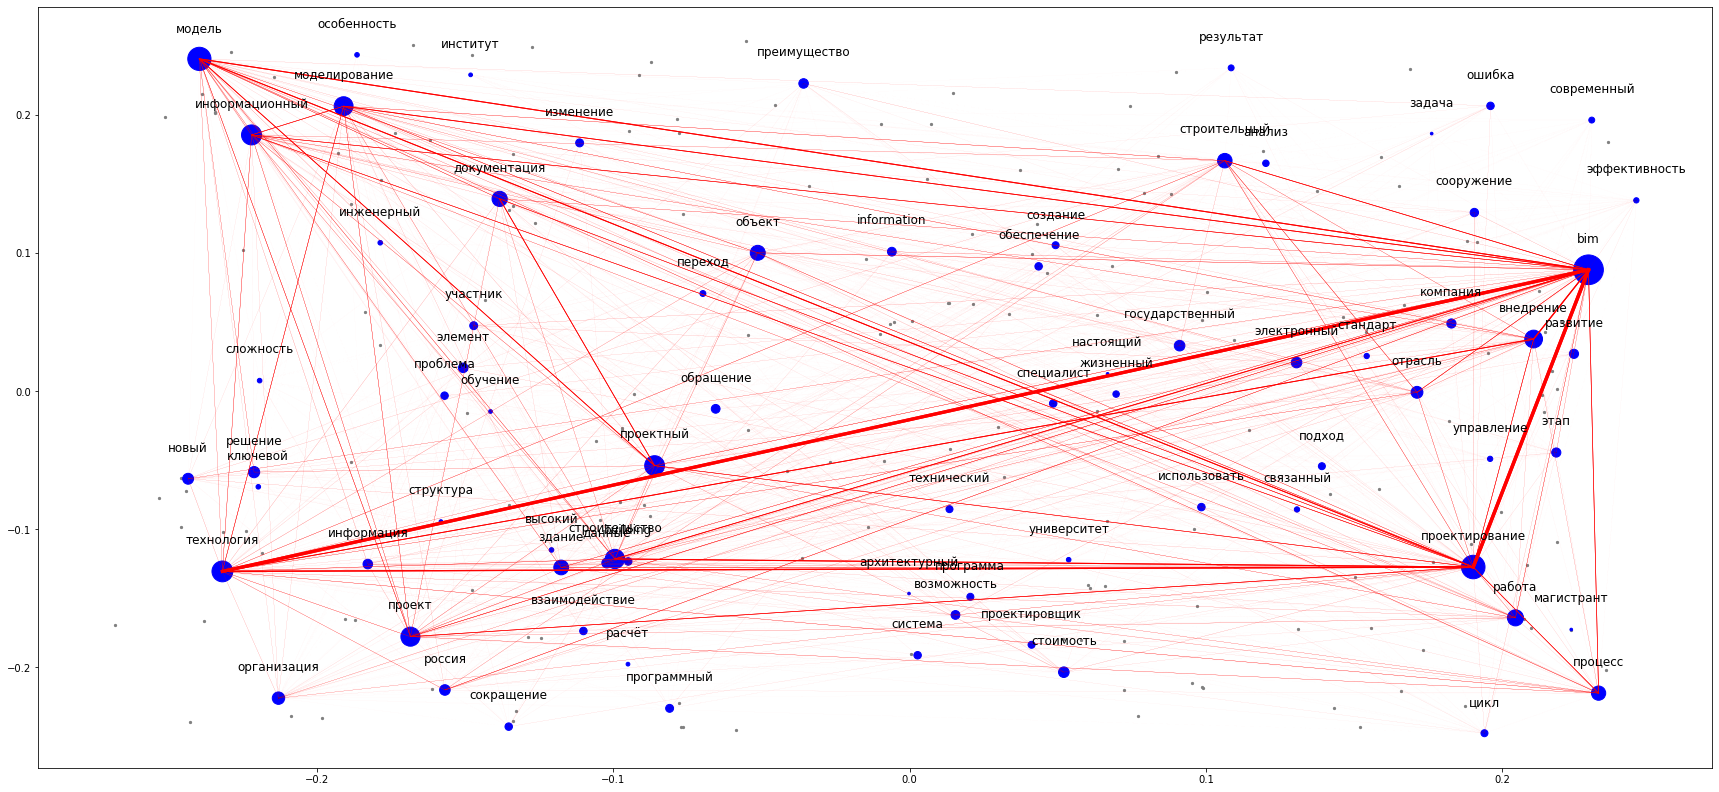

In [ ]:
plt.figure(figsize=(30,14))
plt.scatter(xxx.T[0],xxx.T[1],5,color='gray')
plt.scatter([el[0] for el in yyy.T[1]],[el[1] for el in yyy.T[1]],[count_el[d_num[el]]*7 for el in yyy.T[0]],color='blue') 
for el in yyy:
  plt.text(el[1][0],el[1][1]+0.02,el[0],fontsize=12,ha='center')
for el1 in yyy:
  for el2 in yyy:
    if el1!=el2:
      plt.plot([el1[1][0],el2[1][0]],[el1[1][1],el2[1][1]],linewidth=(sovm_isp[d_num[el1[0]],d_num[el2[0]]]**2)/5000,color='red') 

plt.show()

Делаем через MDS

In [ ]:
mas=[]
for el in corpus: #res_mas
  mas1=np.zeros(len(d_num))
  for xx in Tmodel[el]:
  #  mas1[d_num[xx]]+=1
    mas1[d_num[dct[xx[0]]]]=xx[1] 
  mas.append(mas1)
mas=np.array(mas)
print(mas.shape)
mas2=[]
for xx in d_num.keys():
  r1=mas[:,d_num[xx]]
  r2=mas[r1>0]
  r3=r1[r1>0]
  r4=np.zeros(len(d_num))
  r4[d_num[xx]]=1
  #mas2.append(np.mean(r2/r3.reshape(-1,1),axis=0))
  mas2.append(r4)
mas=np.vstack((mas,mas2))
mas.shape

(185, 76)


(261, 76)

In [ ]:
Tmodel[corpus[5]]

[(0, 0.19126602077987095),
 (3, 0.30496676375960624),
 (11, 0.2775013186219989),
 (12, 0.8477820739044147),
 (13, 0.27326023425739754)]

In [ ]:
mas.shape

(261, 76)

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

In [ ]:
distance_matrix = pairwise_distances(mas, metric = 'cosine')
distance_matrix.shape

(261, 261)

In [ ]:
model = MDS(metric = "precomputed", random_state = 1, n_components = 2)
Xpr = model.fit_transform(distance_matrix) * 100
print(Xpr.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


(261, 2)


In [ ]:
xxx=Xpr[:len(res_mas)]
yy1=Xpr[len(res_mas):]
yyy=np.array([[el,yy1[d_num[el]]] for el in d_base.keys()])
yyy

<ipython-input-356-36818bacf62c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yyy=np.array([[el,yy1[d_num[el]]] for el in d_base.keys()])


array([['настоящий', array([ 89.99276997, -62.13170071])],
       ['расчёт', array([ 59.04642975, -67.19961488])],
       ['переход', array([117.9333612 , -92.02785237])],
       ['специалист', array([ 24.07393243, -15.56676977])],
       ['строительство', array([ 34.20399418, 119.36484916])],
       ['проектировщик', array([ 19.04872385, -69.92059053])],
       ['возможность', array([  2.79708582, -40.91080582])],
       ['отрасль', array([105.78677862,  41.82669479])],
       ['building', array([155.1107985 ,   0.33850679])],
       ['магистрант', array([123.74208658, -77.60859105])],
       ['bim', array([161.94858023, 311.26542573])],
       ['технический', array([  55.9723939 , -169.01554886])],
       ['университет', array([146.68981927, -65.61428701])],
       ['электронный', array([245.41222959, -31.6672037 ])],
       ['государственный', array([158.33620711, -12.81625313])],
       ['проектирование', array([-189.69907859,  157.08260551])],
       ['связанный', array([ 59.26960

<ipython-input-357-89e4bd81af27>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if el1!=el2:


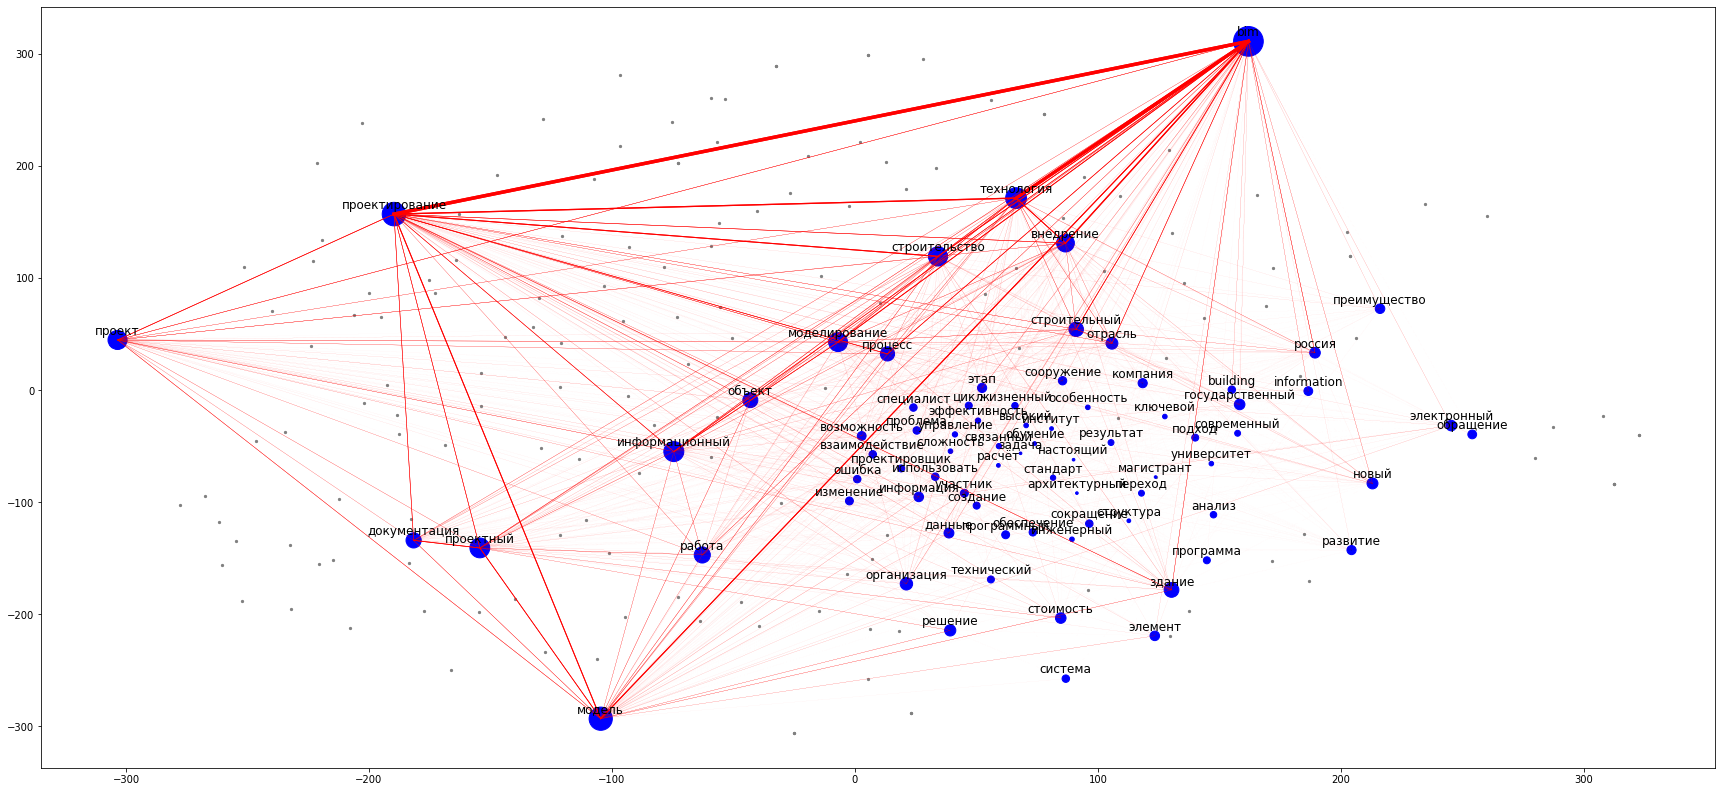

In [ ]:
plt.figure(figsize=(30,14))
plt.scatter(xxx.T[0],xxx.T[1],5,color='gray')
plt.scatter([el[0] for el in yyy.T[1]],[el[1] for el in yyy.T[1]],[count_el[d_num[el]]*7 for el in yyy.T[0]],color='blue') 
for el in yyy:
  plt.text(el[1][0],el[1][1]+5,el[0],fontsize=12,ha='center')
for el1 in yyy:
  for el2 in yyy:
    if el1!=el2:
      plt.plot([el1[1][0],el2[1][0]],[el1[1][1],el2[1][1]],linewidth=(sovm_isp[d_num[el1[0]],d_num[el2[0]]]**2)/5000,color='red') 

plt.show()

tSNE

In [ ]:
model = TSNE(metric = "cosine", random_state = 1, n_components = 2)
Xpr = model.fit_transform(mas) * 100
print(Xpr.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(261, 2)


In [ ]:
xxx=Xpr[:len(res_mas)]
yy1=Xpr[len(res_mas):]
yyy=np.array([[el,yy1[d_num[el]]] for el in d_base.keys()])
yyy

<ipython-input-359-36818bacf62c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yyy=np.array([[el,yy1[d_num[el]]] for el in d_base.keys()])


array([['настоящий', array([1270.3711,  766.9045], dtype=float32)],
       ['расчёт', array([-479.8284,  114.8396], dtype=float32)],
       ['переход', array([ 233.95215, -268.7733 ], dtype=float32)],
       ['специалист', array([262.33722  ,  -6.0057087], dtype=float32)],
       ['строительство', array([254.57341, 796.9763 ], dtype=float32)],
       ['проектировщик', array([609.34644, 623.66003], dtype=float32)],
       ['возможность', array([-10.55533, 461.25244], dtype=float32)],
       ['отрасль', array([-328.7405, 1130.784 ], dtype=float32)],
       ['building', array([-249.0141, 1980.641 ], dtype=float32)],
       ['магистрант', array([-1426.8984 ,   707.69885], dtype=float32)],
       ['bim', array([-1763.839  ,  -303.06305], dtype=float32)],
       ['технический', array([ 451.70294, -467.6171 ], dtype=float32)],
       ['университет', array([-905.2197, 1740.2883], dtype=float32)],
       ['электронный', array([-1681.4586,  1211.489 ], dtype=float32)],
       ['государственный',

<ipython-input-360-89e4bd81af27>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if el1!=el2:


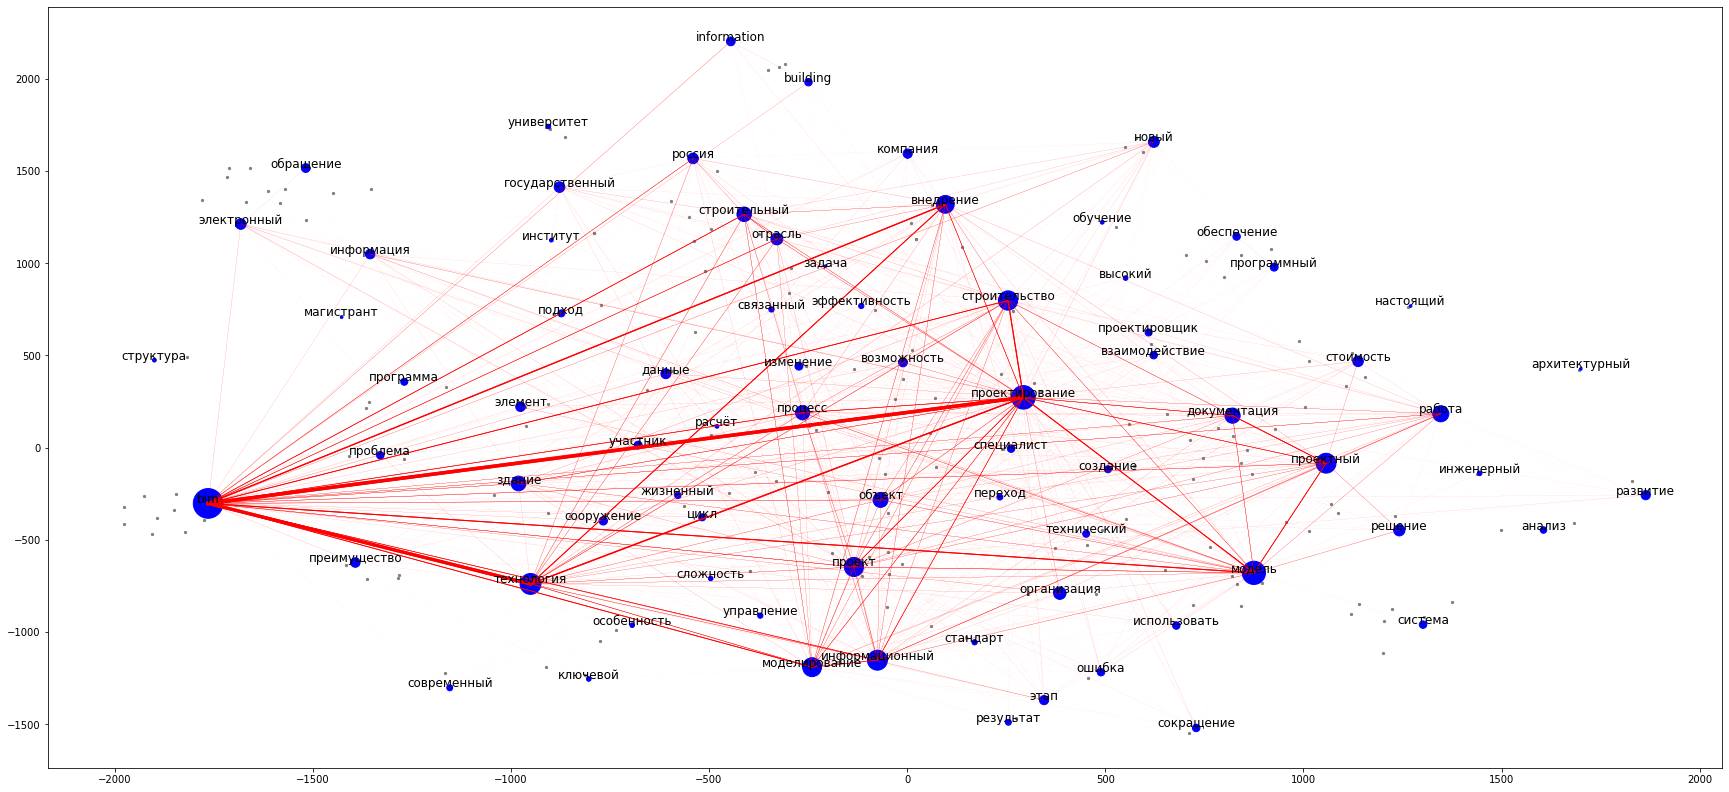

In [ ]:
plt.figure(figsize=(30,14))
plt.scatter(xxx.T[0],xxx.T[1],5,color='gray')
plt.scatter([el[0] for el in yyy.T[1]],[el[1] for el in yyy.T[1]],[count_el[d_num[el]]*7 for el in yyy.T[0]],color='blue') 
for el in yyy:
  plt.text(el[1][0],el[1][1]+5,el[0],fontsize=12,ha='center')
for el1 in yyy:
  for el2 in yyy:
    if el1!=el2:
      plt.plot([el1[1][0],el2[1][0]],[el1[1][1],el2[1][1]],linewidth=(sovm_isp[d_num[el1[0]],d_num[el2[0]]]**2)/5000,color='red') 

plt.show()